<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/MNIST_project_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST

In [ ]:
!wget https://pjreddie.com/media/files/mnist_test.csv
!wget https://pjreddie.com/media/files/mnist_train.csv

--2025-02-01 03:51:17--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [text/csv]
Saving to: ‘mnist_test.csv’

mnist_test.csv      100%[===================>]  17.44M  19.4MB/s    in 0.9s    

2025-02-01 03:51:18 (19.4 MB/s) - ‘mnist_test.csv’ saved [18289443/18289443]

--2025-02-01 03:51:18--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv’

mnist_train.csv     100%[===================>] 104.50M  13.0MB/s    in 7.5s    

2025-02-01 03:51:26 (13.9 MB/s) - ‘mnist_train.csv’ saved [109575994/109575994]



In [ ]:
from torch import nn
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset,random_split #DataLoader data katta bo'lganda alohida bo'laklarga bo'lib beradi

(9999, 785)


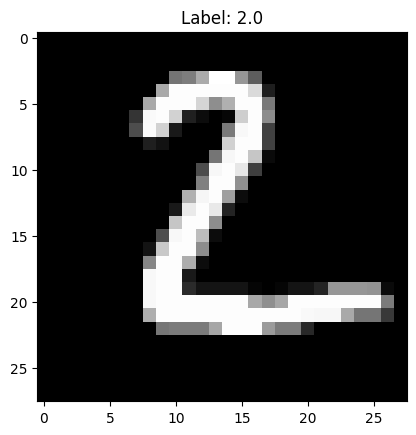

In [ ]:
data =np.genfromtxt('/content/mnist_test.csv',delimiter=',',skip_header=1)
print(data.shape)
img = data[0, 1:]
label = data[0, 0]
plt.imshow(img.reshape((28, 28)), cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
class MNISTDataset(Dataset):
  def __init__(self,path):
    data = np.genfromtxt(path,delimiter=',',skip_header=1,dtype=np.float32)
    self.features=torch.from_numpy(data[:,1:])
    self.labels=torch.from_numpy(data[:,0]).long()
    self.n_samples=data.shape[0]
  def __getitem__(self,index):
    return self.features[index]/255,self.labels[index].item()
  def __len__(self):
    return self.n_samples

In [ ]:
test_dataset = MNISTDataset('/content/mnist_test.csv')
train_dataset = MNISTDataset('/content/mnist_train.csv')

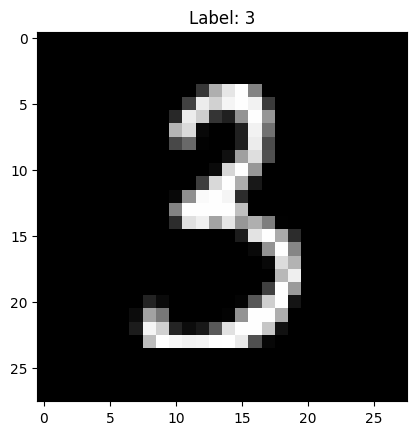

In [ ]:
img,label = test_dataset[75]
plt.imshow(img.reshape((28, 28)), cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
train_dataloader = DataLoader(train_dataset,batch_size=10000,shuffle=True)#random shuffel
test_dataloader = DataLoader(test_dataset,batch_size=1000,shuffle=True)
#batch xotiradan alohida bo'laklab ajratib olish Training jarayoniga o'tkazadi

In [ ]:
for i, (x, y) in enumerate(train_dataloader):
    print(f'Batch Train {i}:')
    print(f'Input shape: {x.shape}, Label shape: {y.shape}')
for i, (x, y) in enumerate(test_dataloader):
    print(f'Batch Test{i}:')
    print(f'Input shape: {x.shape}, Label shape: {y.shape}')

Batch Train 0:
Input shape: torch.Size([10000, 784]), Label shape: torch.Size([10000])
Batch Train 1:
Input shape: torch.Size([10000, 784]), Label shape: torch.Size([10000])
Batch Train 2:
Input shape: torch.Size([10000, 784]), Label shape: torch.Size([10000])
Batch Train 3:
Input shape: torch.Size([10000, 784]), Label shape: torch.Size([10000])
Batch Train 4:
Input shape: torch.Size([10000, 784]), Label shape: torch.Size([10000])
Batch Train 5:
Input shape: torch.Size([9999, 784]), Label shape: torch.Size([9999])
Batch Test0:
Input shape: torch.Size([1000, 784]), Label shape: torch.Size([1000])
Batch Test1:
Input shape: torch.Size([1000, 784]), Label shape: torch.Size([1000])
Batch Test2:
Input shape: torch.Size([1000, 784]), Label shape: torch.Size([1000])
Batch Test3:
Input shape: torch.Size([1000, 784]), Label shape: torch.Size([1000])
Batch Test4:
Input shape: torch.Size([1000, 784]), Label shape: torch.Size([1000])
Batch Test5:
Input shape: torch.Size([1000, 784]), Label shape: t

In [ ]:
# MNIST Model
class Net(torch.nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=input, out_features=256)
        self.fc2 = torch.nn.Linear(in_features=256, out_features=128)
        self.fc3 = torch.nn.Linear(in_features=128, out_features=32)
        self.fc4 = torch.nn.Linear(in_features=32, out_features=output)
        self.relu = torch.nn.ReLU()
        self.softmax =torch.nn.Softmax(dim=1)
        # Activation function


    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))

        out = self.softmax(self.fc4(x))
        return out

model = Net(input=784,output=10)
# Set the learning rate for the optimizer
learning_rate = 0.001

# Define the loss function (criterion) for the classification task
criterion =nn.CrossEntropyLoss()

# Initialize the optimizer using the Adam optimization algorithm
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

history = {'loss':[], 'loss_val':[], 'accuracy':[], 'val_accuracy':[]}

In [ ]:
epochs=5
total_step = len(train_dataloader)
for epoch in range(epochs):
  sum_loss = 0
  sum_acc = 0
  for i,(train_x,train_y) in enumerate(train_dataloader):
    optimizer.zero_grad()
    # forward
    outputs = model(train_x)
    # loss
    loss = criterion(outputs,train_y)
    sum_loss+=loss.item()
    # backward
    loss.backward()
    optimizer.step()
    # accuracy
    corrects = (outputs.argmax(axis=1)==train_y).sum().item()
    train_acc = corrects/train_y.size(0)
    sum_acc+=train_acc
  train_loss=sum_loss/total_step
  train_acc = sum_acc/total_step
  print(f'Epoch[{epoch+1}/{epochs}] \t loss: {train_loss:0.5f} \t accuracy:{train_acc} ')

Epoch[1/5] 	 loss: 1.60465 	 accuracy:0.8594476647664767 
Epoch[2/5] 	 loss: 1.60348 	 accuracy:0.8609309530953095 
Epoch[3/5] 	 loss: 1.60218 	 accuracy:0.8622311131113111 
Epoch[4/5] 	 loss: 1.60121 	 accuracy:0.8627144097743108 
Epoch[5/5] 	 loss: 1.60024 	 accuracy:0.8643477514418109 


In [ ]:
def train(model,train_loader,criterion,optimizer,history):
  # Initialize variables to store total loss and total accuracy
  sum_loss = 0
  sum_accuracy = 0
  # Get the total number of batches in the training data loader
  n= len(train_loader)
  # Iterate through the bathes in the training data loder
  for i,(data,label) in enumerate(train_dataloader):

      optimizer.zero_grad()
      # Pass the input data through the model to get predictions
      output = model(data)
      # Compute the loss between model predictions and actual labels
      loss = criterion(output,label)
      # Accumulate the total loss
      sum_loss+=loss.cpu().item()
      # Compute the number of correct predictions in the batch
      n_corrects = (output.argmax(axis=1)==label).sum().item()
      # Accumulate the total accuracy
      sum_accuracy+=n_corrects/label.size(0)
      # Perform backpropagation to compute gradients
      loss.backward()
      # Update the model parametrs using the computed gradients
      optimizer.step()
  train_loss=sum_loss/n
  train_accuracy = sum_accuracy/n
  history['loss'].append(train_loss)
  history['accuracy'].append(train_accuracy)
  return train_loss,train_accuracy
def validate(model,test_loader,criterion,history):
  # Initialize variables to store total loss and total accuracy
  sum_loss = 0
  sum_accuracy = 0
  # Get the total number of batches in the training data loader
  n= len(test_loader)
  # Iterate through the bathes in the training data loder
  for i,(data,label) in enumerate(test_dataloader):
      # Pass the input data through the model to get predictions
      output = model(data)
      # Compute the loss between model predictions and actual labels
      loss = criterion(output,label)
      # Compute the number of correct predictions in the batch
      n_corrects = (output.argmax(axis=1)==label).sum().item()
      # Accumulate the total accuracy
      sum_loss+=loss.cpu().item()
      sum_accuracy+=n_corrects/label.size(0)
  # Calculate average validation  loss and accuracy over all batches
  val_loss=sum_loss/n
  val_accuracy = sum_accuracy/n
  # Append the validation loss and accuracy to the history dictionary
  history['loss_val'].append(val_loss)
  history['val_accuracy'].append(val_accuracy)
  return val_loss,val_accuracy

In [ ]:
epochs =5
for epoch in range(epochs):
  train_loss,train_acc = train(model,train_dataloader,criterion,optimizer,history)
  print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}')
  val_loss,val_acc = validate(model,test_dataloader,criterion,history)
  print(f'Epoch {epoch+1}/{epochs}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

Epoch 1/5, Train Loss: 2.2978, Train Accuracy: 0.2480
Epoch 1/5, Val Loss: 2.2854, Val Accuracy: 0.4131
Epoch 2/5, Train Loss: 2.2641, Train Accuracy: 0.4057
Epoch 2/5, Val Loss: 2.2163, Val Accuracy: 0.4301
Epoch 3/5, Train Loss: 2.1654, Train Accuracy: 0.4594
Epoch 3/5, Val Loss: 2.0789, Val Accuracy: 0.5196
Epoch 4/5, Train Loss: 2.0175, Train Accuracy: 0.6080
Epoch 4/5, Val Loss: 1.9164, Val Accuracy: 0.7122
Epoch 5/5, Train Loss: 1.8645, Train Accuracy: 0.7176
Epoch 5/5, Val Loss: 1.7887, Val Accuracy: 0.7443


In [ ]:
# history['accuracy']
history['loss']

[2.2986704111099243,
 2.275471011797587,
 2.199881434440613,
 2.068953275680542,
 1.9426701466242473]

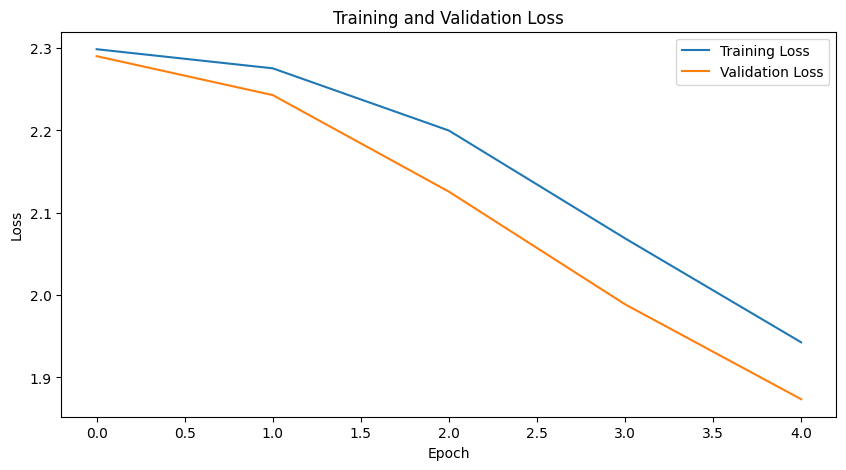

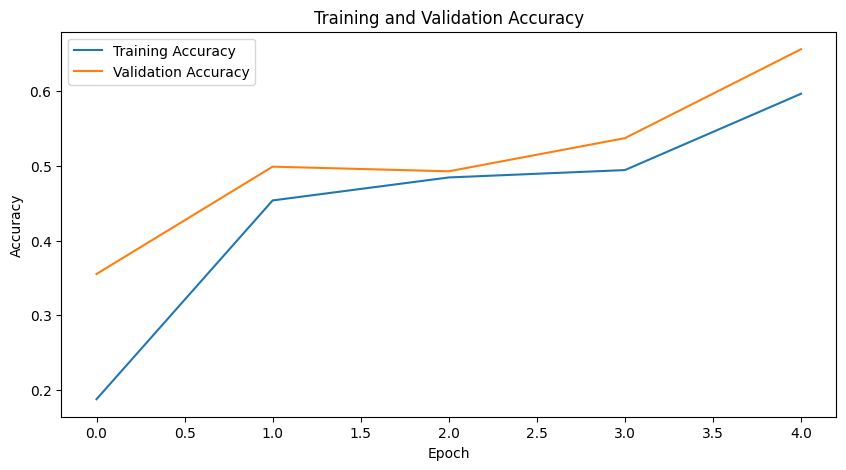

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' dictionary is already populated from the previous code
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['loss_val'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
epochs = 5
total_step = len(train_dataloader)

for epoch in range(epochs):
    sum_loss = 0
    sum_acc = 0
    for i,(train_x,train_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        # forward
        outputs = model(train_x)
        # loss
        loss = criterion(outputs,train_y)
        sum_loss+=loss.item()
        corrects = (outputs.argmax(axis=1)==train_y).sum().item()
        sum_acc+=corrects/train_y.size(0)
        # backward
        loss.backward()

        optimizer.step()
    train_loss=sum_loss/total_step
    train_acc = sum_acc/total_step
    print(f'Epoch[{epoch+1}/{epochs}] \t loss: {train_loss:0.5f} \t accuracy:{train_acc} ')

Epoch[1/5] 	 loss: 1.84413 	 accuracy:0.67534500450045 
Epoch[2/5] 	 loss: 1.77617 	 accuracy:0.7338795829582958 
Epoch[3/5] 	 loss: 1.70851 	 accuracy:0.8049135946928025 
Epoch[4/5] 	 loss: 1.66224 	 accuracy:0.8334973747374738 
Epoch[5/5] 	 loss: 1.63377 	 accuracy:0.8531143714371437 
